In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import control
from ipywidgets import interact



# Error de Estado Estacionario

En el bucle de control, el error se calcula como la diferencia entre la referencia y la variable controlada.

![bucle](figuras/bucle.PNG)

Los cambios en la señal de referencia provocan errores durante los transitorios y pueden generar un error estacionario.

Considerando un sistema de control con realimentación unitaria y función de transferencia de lazo abierto $G(s) = G_c(s)G_a(s)G_p(s)$:

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s^N(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)}$$

Este sistema tiene:
- $c$ ceros definidos por $T_{c1}$, $T_{c2}$, $T_{c3}$, ..., $T_{cc}$
- $N$ polos en $0$
- $p$ polos definidos por $T_{p1}$, $T_{p2}$, $T_{p3}$, ..., $T_{pp}$



La función de transferencia de lazo cerrado desde la referencia hacia la variable controlada es:

$$\frac{C(s)}{R(s)} = \frac{G(s)}{1 + G_(s)}$$

La función de transferencia de lazo cerrado desde la referencia hacia el error es:

$$\frac{E(s)}{R(s)} = \frac{R(s)-C(s)}{R(s)} = 1- \frac{C(s)}{R(s)} = 1 - \frac{G(s)}{1 + G(s)} = \frac{1}{1+G(s)}$$

El **error de estado estacionario** puede calcularse como:

$$E_{ee} = \lim_{t \rightarrow \infty} e(t) = \lim_{s \rightarrow 0} sE(s) = \lim_{s \rightarrow 0}\frac{sR(s)}{1+G(s)}$$

## Error de estado estacionario ante una entrada escalón (posición)

Dada esta señal como referencia:

$$R(s) = \frac{1}{s}$$

y

$$E_{ee} = \lim_{s \rightarrow 0}\frac{s \frac{1}{s} }{1+G(s)} = \frac{1}{1+ \lim_{s \rightarrow 0} G(s) }$$

**Ejemplo**

Suponga:

$$G(s) = \frac{1}{5s + 1}$$

Entonces:

$$E_{ee} =\frac{1}{1+ \underbrace{\lim_{s \rightarrow 0} \frac{1}{5s + 1}}_{1} }$$

Si se introduce una ganancia $K_p$ (controlador proporcional):

$$E_{ee} =\frac{1}{1+ \underbrace{\lim_{s \rightarrow 0} \frac{K_p}{5s + 1}}_{K_p} }$$


In [2]:
# Se define la función de transferencia
G = control.tf(1, [5,1])
G*2

TransferFunction(array([2.]), array([5, 1]))

Análisis $E_{ee}$


$$E_{ee} =\frac{1}{1+ \underbrace{\lim_{s \rightarrow 0} \frac{K_p}{5s + 1}}_{K_p} } = \frac{1}{1+K_p}$$


[0.6666666666666666, 0.5714285714285714, 0.5, 0.3333333333333333, 0.25, 0.16666666666666666, 0.09090909090909091]


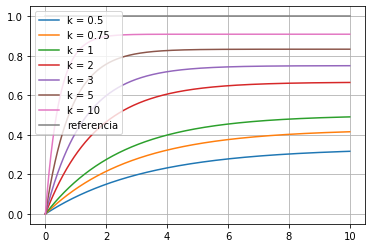

In [3]:
ts = np.linspace(0, 10, 2000)

Kp = [0.5,0.75,1,2,3,5,10]
etiq = []
e = []
for k in Kp:
    
    GLC = control.feedback(k*G,1)
    _, yLC = control.step_response(GLC, ts)
    e.append(1/(1+k))
    plt.plot(ts, yLC)
    etiq.append('k = '+str(k))
etiq.append('referencia')
plt.plot([ts[0],ts[-1]], [1,1])
plt.legend(etiq)
plt.grid(True)
print(e)

¿Qué pasa si el sistema tiene una dinámica integradora?

$$G(s) = \frac{1}{s(5s + 1)}$$


In [4]:
# Se define la función de transferencia
G = control.tf(1, [5,1,0])
G*2

TransferFunction(array([2.]), array([5, 1, 0]))

Análisis $E_{ee}$


$$E_{ee} =\frac{1}{1+ \underbrace{\lim_{s \rightarrow 0} \frac{1}{s(5s + 1)}}_{\infty} } = 0$$

[0.6666666666666666, 0.5714285714285714, 0.5, 0.3333333333333333, 0.25, 0.16666666666666666, 0.09090909090909091]


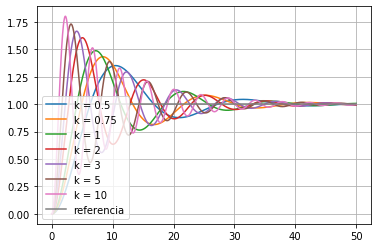

In [5]:
ts = np.linspace(0, 50, 2000)

Kp = [0.5,0.75,1,2,3,5,10]
etiq = []
e = []
for k in Kp:
    
    GLC = control.feedback(k*G,1)
    _, yLC = control.step_response(GLC, ts)
    e.append(1/(1+k))
    plt.plot(ts, yLC)
    etiq.append('k = '+str(k))
etiq.append('referencia')
plt.plot([ts[0],ts[-1]], [1,1])
plt.legend(etiq)
plt.grid(True)
print(e)

Observe que la presencia de una dinámica integradora hace que el sistema en lazo cerrado tenga error de estado estable nulo. La cantidad de polos integradores determina el **tipo** del sistema:

### Sistemas tipo cero

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{(T_{p1}s+1)(T_{p2}s+1)(T_{c3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \frac{1}{1+ \lim_{s \rightarrow 0} G(s) } \\ 
& = \frac{1}{1+ \lim_{s \rightarrow 0} K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} } \\
& = \frac{1}{1+ K }
\end{align}




### Sistemas tipo uno

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \frac{1}{1+ \lim_{s \rightarrow 0} G(s) } \\ 
& = \frac{1}{1+ \lim_{s \rightarrow 0} K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} } \\
& = 0
\end{align}



### Sistemas tipo dos

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s^2(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \frac{1}{1+ \lim_{s \rightarrow 0} G(s) } \\ 
& = \frac{1}{1+ \lim_{s \rightarrow 0} K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s^2(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} } \\
& = 0
\end{align}

## Error de estado estacionario ante una entrada rampa (velocidad)
$$R(s) = \frac{1}{s^2} $$

\begin{align}
E_{ee} &= \lim_{s \rightarrow 0}\frac{sR(s)}{1+G(s)} \\ 
&=  \lim_{s \rightarrow 0}\frac{s\frac{1}{s^2}}{1+G(s)} \\
&=  \lim_{s \rightarrow 0}\frac{1}{s+sG(s)} \\
&= \lim_{s \rightarrow 0} \frac{1}{sG(s)}
\end{align}


### Sistemas tipo cero

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \lim_{s \rightarrow 0} \frac{1}{sG(s)} \\ 
& = \lim_{s \rightarrow 0} \frac{1}{sK\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} }\\
& = \infty
\end{align}



**Ejemplo**

Suponga:

$$G(s) = \frac{1}{5s + 1}$$

Entonces:

$$E_{ee} =\frac{1}{1+ \underbrace{\lim_{s \rightarrow 0} \frac{1}{5s + 1}}_{1} }$$

Si se introduce una ganancia $K_p$ (controlador proporcional):

$$E_{ee} =\frac{1}{1+ \underbrace{\lim_{s \rightarrow 0} \frac{K_p}{5s + 1}}_{K_p} }$$


In [6]:
# Se define la función de transferencia
G = control.tf(1, [5,1])
G

TransferFunction(array([1]), array([5, 1]))

[0.6666666666666666, 0.5714285714285714, 0.5, 0.3333333333333333, 0.25, 0.16666666666666666, 0.09090909090909091]


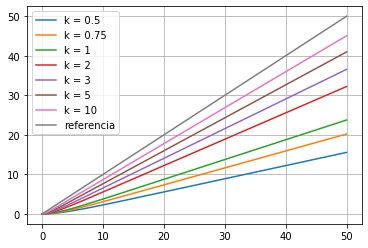

In [7]:
ts = np.linspace(0, 50, 2000)

Kp = [0.5,0.75,1,2,3,5,10]
etiq = []
e = []
for k in Kp:
    
    GLC = control.feedback(k*G,1)
    _, yLC = control.step_response(control.tf(1,[1,0])*GLC, ts)
    e.append(1/(1+k))
    plt.plot(ts, yLC)
    etiq.append('k = '+str(k))
etiq.append('referencia')
plt.plot([ts[0],ts[-1]], [0,ts[-1]])
plt.legend(etiq)
plt.grid(True)
print(e)


### Sistemas tipo uno

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{p3}s+1)...(T_{cc}s+1)}{s(T_{p1}s+1)(T_{p2}s+1)(T_{c3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \lim_{s \rightarrow 0} \frac{1}{sG(s)} \\ 
& = \lim_{s \rightarrow 0} \frac{1}{sK\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} }\\
& = \frac{1}{K}
\end{align}



In [8]:
# Se define la función de transferencia
G = control.tf(1, [5,1,0])
G

TransferFunction(array([1]), array([5, 1, 0]))

[0.6666666666666666, 0.5, 0.16666666666666666, 0.09090909090909091]


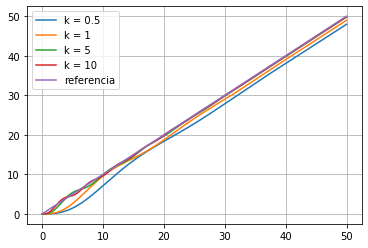

In [9]:
ts = np.linspace(0, 50, 2000)

Kp = [0.5,1,5,10]
etiq = []
e = []
for k in Kp:
    
    GLC = control.feedback(k*G,1)
    _, yLC = control.step_response(control.tf(1,[1,0])*GLC, ts)
    e.append(1/(1+k))
    plt.plot(ts, yLC)
    etiq.append('k = '+str(k))
etiq.append('referencia')
plt.plot([ts[0],ts[-1]], [0,ts[-1]])
plt.legend(etiq)
plt.grid(True)
print(e)

### Sistemas tipo dos

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s^2(T_{p1}s+1)(T_{p2}s+1)(T_{c3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \lim_{s \rightarrow 0} \frac{1}{sG(s)} \\ 
& = \lim_{s \rightarrow 0} \frac{1}{sK\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s^2(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} }\\
& = \frac{s}{K} = 0
\end{align}

In [10]:
## Desarrolle su propio ejemplo



## Error de estado estacionario ante una entrada parábola (aceleración)

$$R(s) = \frac{1}{s^3} $$

\begin{align}
E_{ee} &= \lim_{s \rightarrow 0}\frac{sR(s)}{1+G(s)} \\ 
&=  \lim_{s \rightarrow 0}\frac{s\frac{1}{s^3}}{1+G(s)} \\
&=  \lim_{s \rightarrow 0}\frac{1}{s^2+s^2G(s)} \\
&= \lim_{s \rightarrow 0} \frac{1}{s^2G(s)}
\end{align}


### Sistemas tipo cero

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \lim_{s \rightarrow 0} \frac{1}{s^2G(s)} \\ 
& = \lim_{s \rightarrow 0} \frac{1}{s^2K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} }\\
& = \infty
\end{align}

In [11]:
## Desarrolle su propio ejemplo





### Sistemas tipo uno

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{p3}s+1)...(T_{cc}s+1)}{s(T_{p1}s+1)(T_{p2}s+1)(T_{c3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \lim_{s \rightarrow 0} \frac{1}{s^2G(s)} \\ 
& = \lim_{s \rightarrow 0} \frac{1}{s^2K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} }\\
& =  \infty
\end{align}



In [12]:
## Desarrolle su propio ejemplo


### Sistemas tipo dos

$$G(s) = K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s^2(T_{p1}s+1)(T_{p2}s+1)(T_{c3}s+1)...(T_{pp}s+1)} $$

\begin{align}
E_{ee} &= \lim_{s \rightarrow 0} \frac{1}{sG(s)} \\ 
& = \lim_{s \rightarrow 0} \frac{1}{s^2K\frac{(T_{c1}s+1)(T_{c2}s+1)(T_{c3}s+1)...(T_{cc}s+1)}{s^2(T_{p1}s+1)(T_{p2}s+1)(T_{p3}s+1)...(T_{pp}s+1)} }\\
& = \frac{1}{K}
\end{align}

In [13]:
## Desarrolle su propio ejemplo


## Tabla

|error   | $$\frac{1}{s}$$|$$\frac{1}{s^2}$$|$$\frac{1}{s^3}$$|
|--------|----------------|-----------------|-----------------|
| tipo 0 |$$\frac{1}{1+K}$$ |$$\infty$$     | $$\infty$$      | 
| tipo 1 |$$0$$           |$$ \frac{1}{K}$$ | $$\infty$$      |
| tipo 2 |$$0$$           |$$ 0 $$          | $$ \frac{1}{K}$$|
